In [12]:
!pip install pandas_datareader
!pip install matplotlib

In [13]:
import pandas_datareader.data as pdr
import datetime

In [14]:
ticker = "MSFT"

In [15]:
ohlcv = pdr.get_data_yahoo(ticker,datetime.date.today()-datetime.timedelta(1825),datetime.date.today())

In [16]:
type(ohlcv)

pandas.core.frame.DataFrame

In [17]:
ohlcv.shape

(1258, 6)

In [18]:
ohlcv.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-19,48.099998,47.169998,47.630001,47.660000,64551200.0,42.787170
2014-12-22,48.119999,47.709999,47.779999,47.980000,26566000.0,43.074444
2014-12-23,48.799999,48.130001,48.369999,48.450001,23648100.0,43.496403
2014-12-24,48.639999,48.080002,48.639999,48.139999,11437800.0,43.218105


In [19]:
ohlcv.tail(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-13,154.889999,152.830002,153.000000,154.529999,23845400.0,154.529999
2019-12-16,155.899994,154.820007,155.110001,155.529999,24144200.0,155.529999
2019-12-17,155.710007,154.449997,155.449997,154.690002,25425600.0,154.690002
2019-12-18,155.479996,154.179993,154.300003,154.369995,24129200.0,154.369995


In [20]:
def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

In [21]:
def BollBnd(DF,n):
    "function to calculate Bollinger Band"
    df = DF.copy()
    df["MA"] = df['Adj Close'].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df['Adj Close'].rolling(n).std(ddof=0) #ddof=0 is required since we want to take the standard deviation of the population and not sample
    df["BB_dn"] = df["MA"] - 2*df['Adj Close'].rolling(n).std(ddof=0) #ddof=0 is required since we want to take the standard deviation of the population and not sample
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df

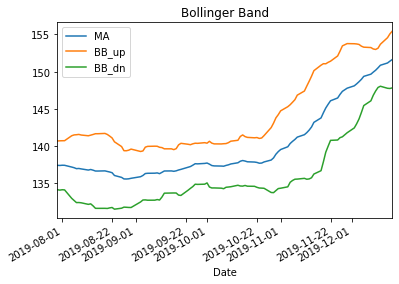

In [22]:
# Visualizing Bollinger Band of the stocks for last 100 data points
BollBnd(ohlcv,20).iloc[-100:,[-4,-3,-2]].plot(title="Bollinger Band")